In [5]:
import cv2
import numpy as np
import pytesseract
import os
import matplotlib.pyplot as plt
from pathlib import Path

current_directory = Path.cwd()

input_folder = current_directory / "images" / "after"


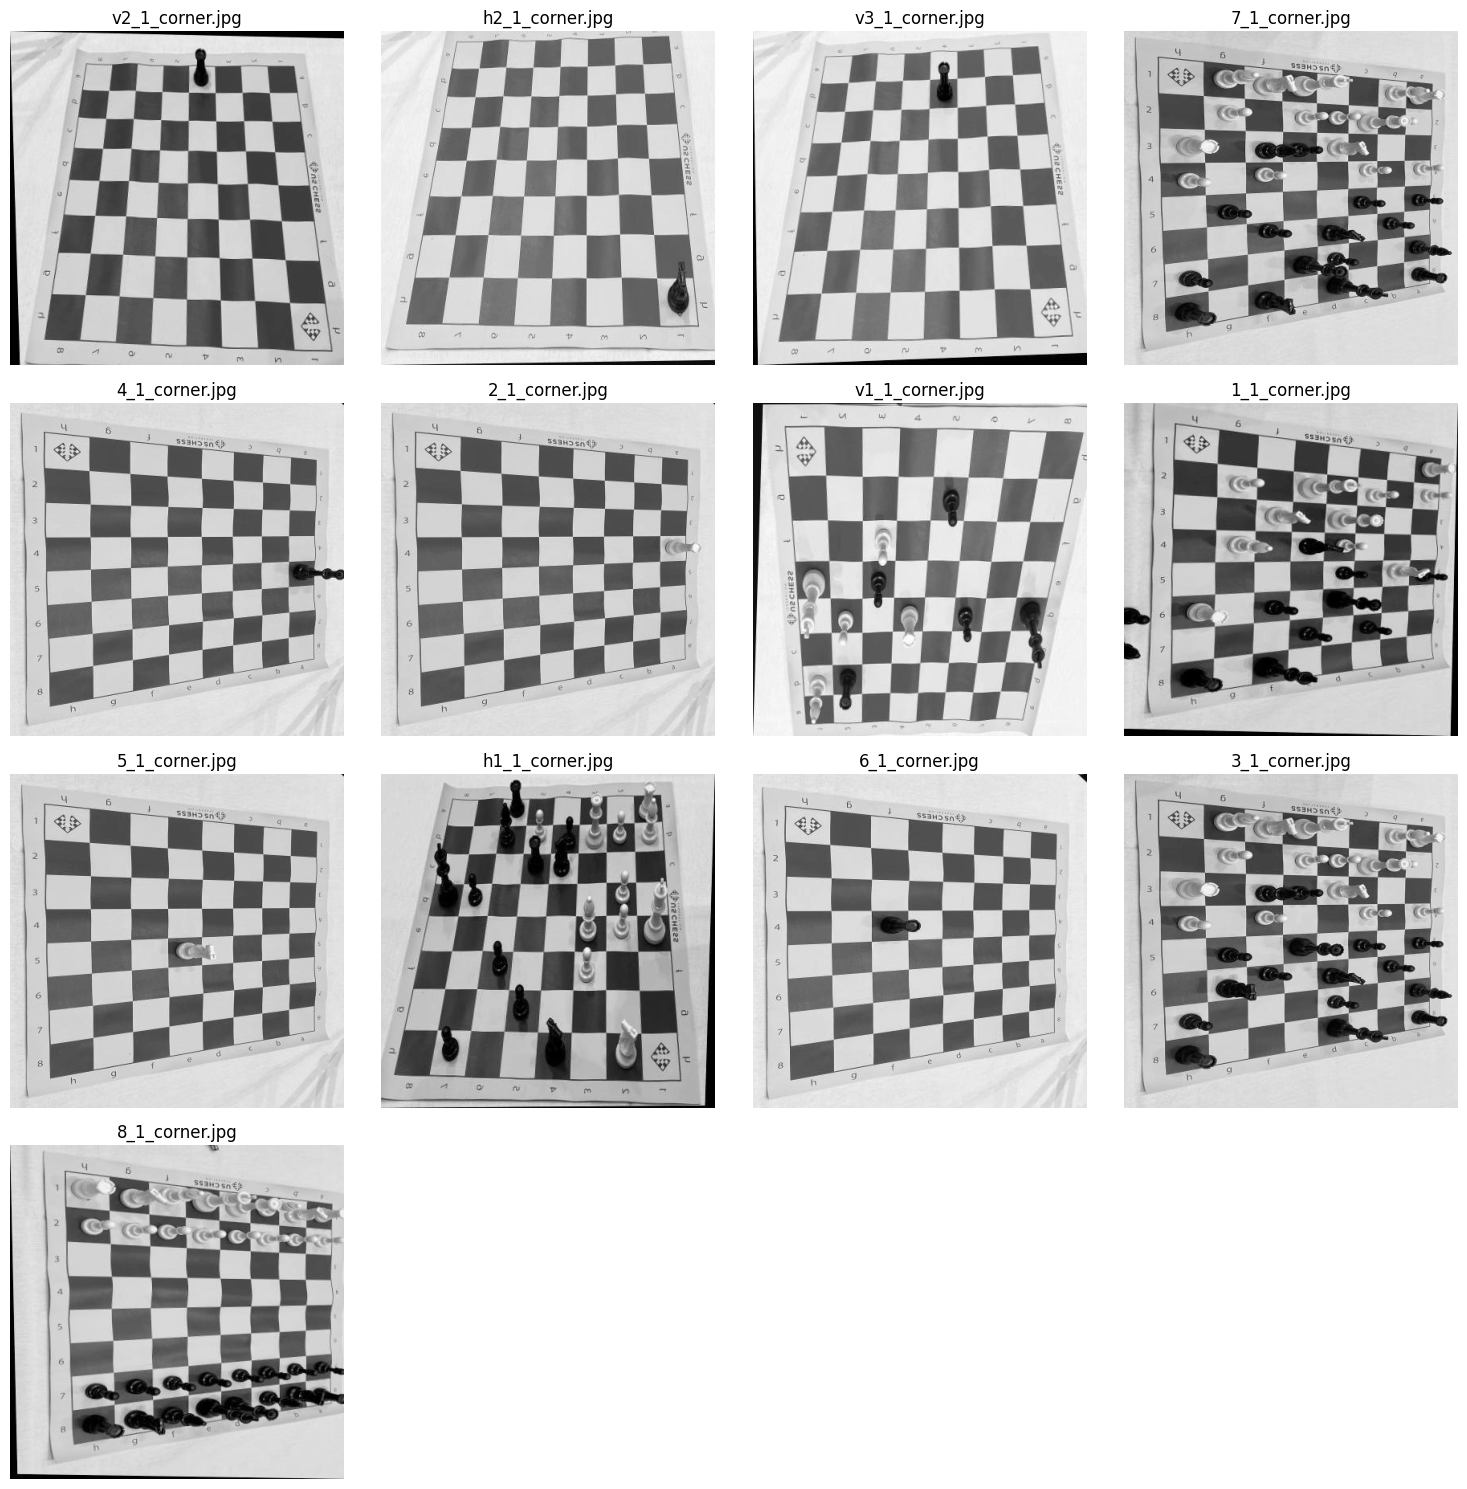

In [3]:
# Get a list of image files in the folder
image_files = [f for f in os.listdir(input_folder) if f.endswith('corner.jpg') or f.endswith('.png')]

# Number of images
num_images = len(image_files)

# Define grid size (e.g., 3 rows and 3 columns for a 9-image grid)
grid_size = int(np.ceil(np.sqrt(num_images)))  # This calculates the grid size to fit the number of images

# Create a figure to display all the images
plt.figure(figsize=(15, 15))

# Loop over the image files and display them in subplots
for i, image_file in enumerate(image_files):
    image_path = os.path.join(input_folder, image_file)
    
    # Load the image
    image = cv2.imread(image_path)
    
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Create subplot for each image
    plt.subplot(grid_size, grid_size, i + 1)  # Position (i + 1) in the grid
    plt.imshow(gray, cmap='gray')
    plt.title(f'{image_file}')
    plt.axis('off')  # Hide axes

# Display the grid of images
plt.tight_layout()
plt.show()


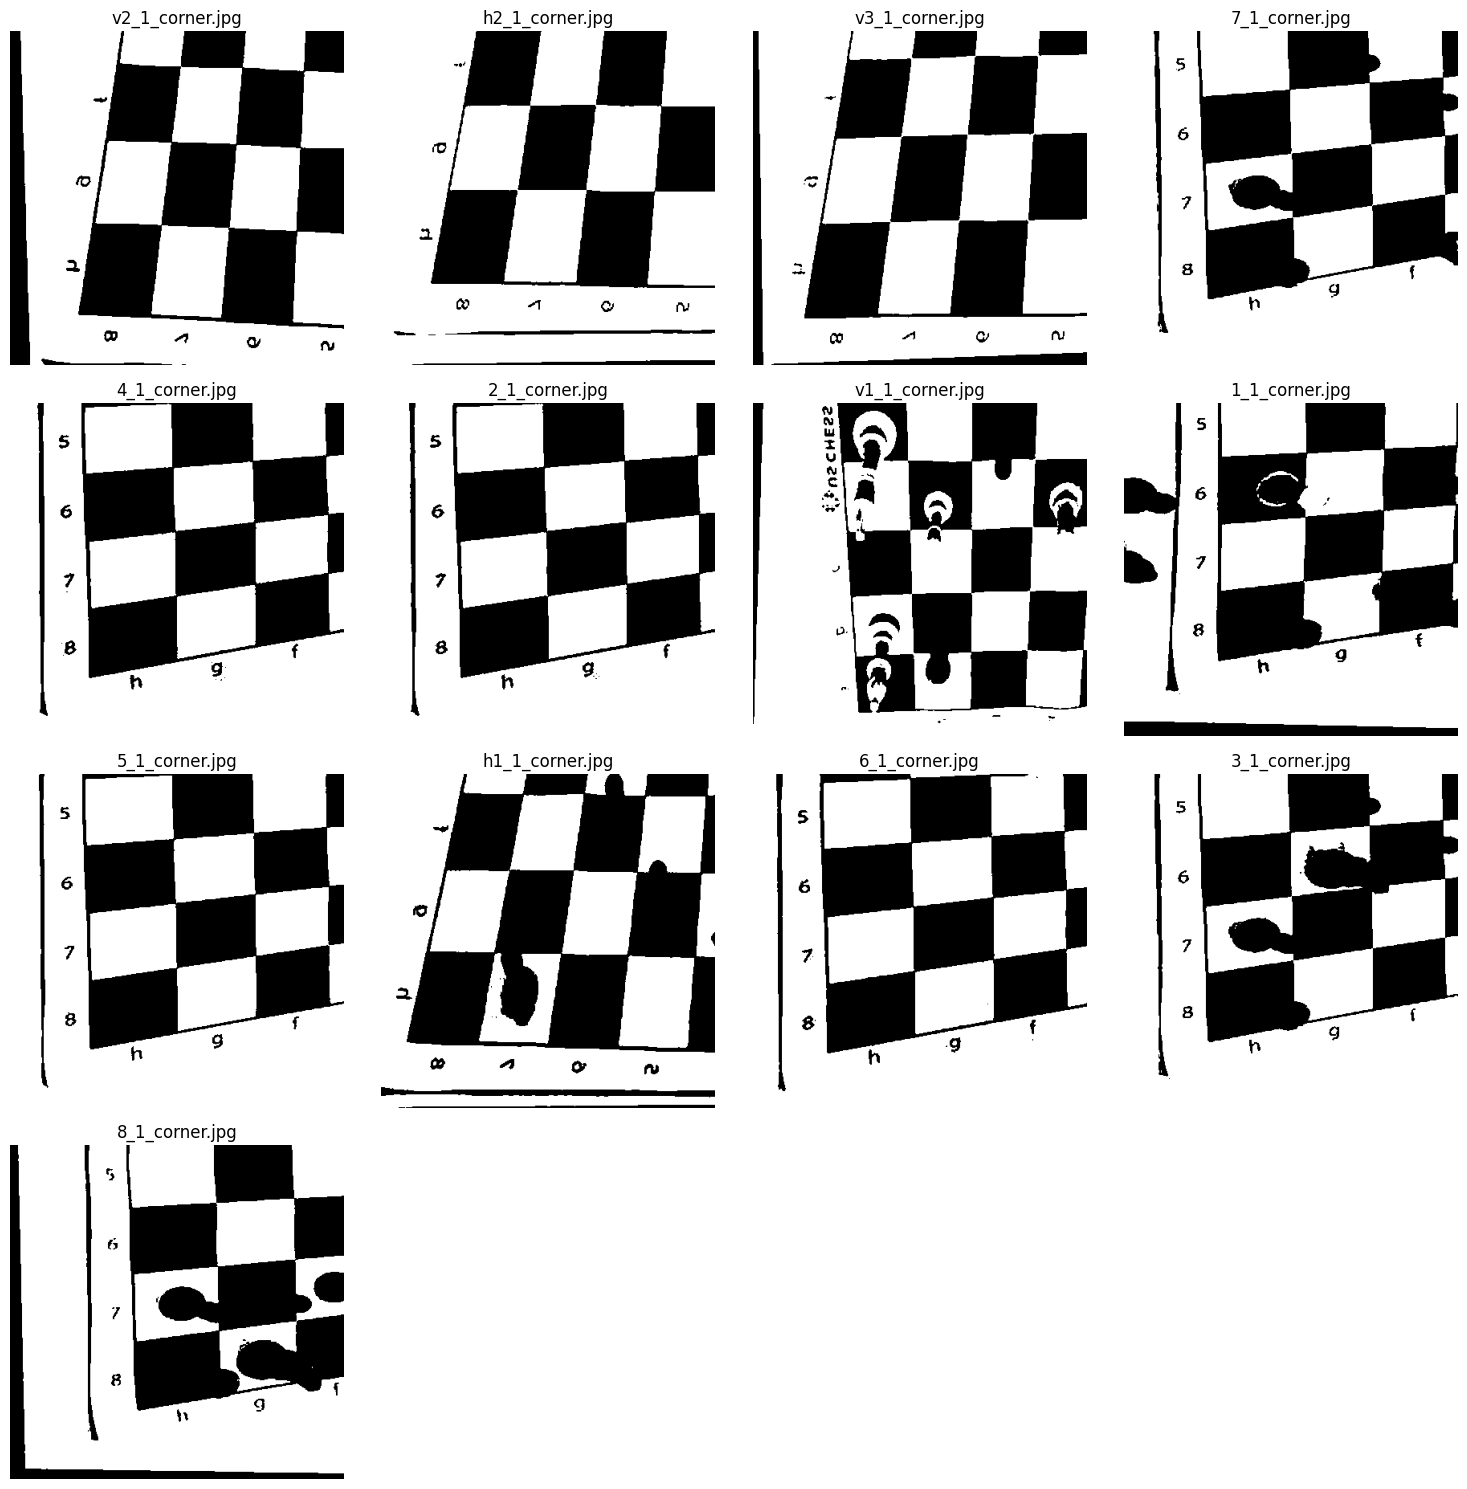

In [15]:
# Get a list of image files in the folder
image_files = [f for f in os.listdir(input_folder) if f.endswith('corner.jpg')]

# Number of images
num_images = len(image_files)

# Define grid size (e.g., 3 rows and 3 columns for a 9-image grid)
grid_size = int(np.ceil(np.sqrt(num_images)))  # This calculates the grid size to fit the number of images

# Create a figure to display all the images
plt.figure(figsize=(15, 15))

# Loop over the image files and display them in subplots
for i, image_file in enumerate(image_files):
    image_path = os.path.join(input_folder, image_file)
    
    # Load the image
    image = cv2.imread(image_path)
    
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    crop = gray[height // 2:, 0:width // 2]
    
    # Resize the image
    height, width = crop.shape
    enlarge = cv2.resize(crop, (width * 2, height * 2), interpolation=cv2.INTER_CUBIC)
    height, width = enlarge.shape
    
    # Normalize the image
    norm = cv2.normalize(enlarge, np.zeros((height, width)), 0, 255, cv2.NORM_MINMAX)
    
    # Apply threshold
    _, th = cv2.threshold(norm, 170, 255, cv2.THRESH_BINARY)
    
    
    
    # Create subplot for each image
    plt.subplot(grid_size, grid_size, i + 1)  # Position (i + 1) in the grid
    plt.imshow(th, cmap='gray')
    plt.title(f'{image_file}')
    plt.axis('off')  # Hide axes

# Display the grid of images
plt.tight_layout()
plt.show()


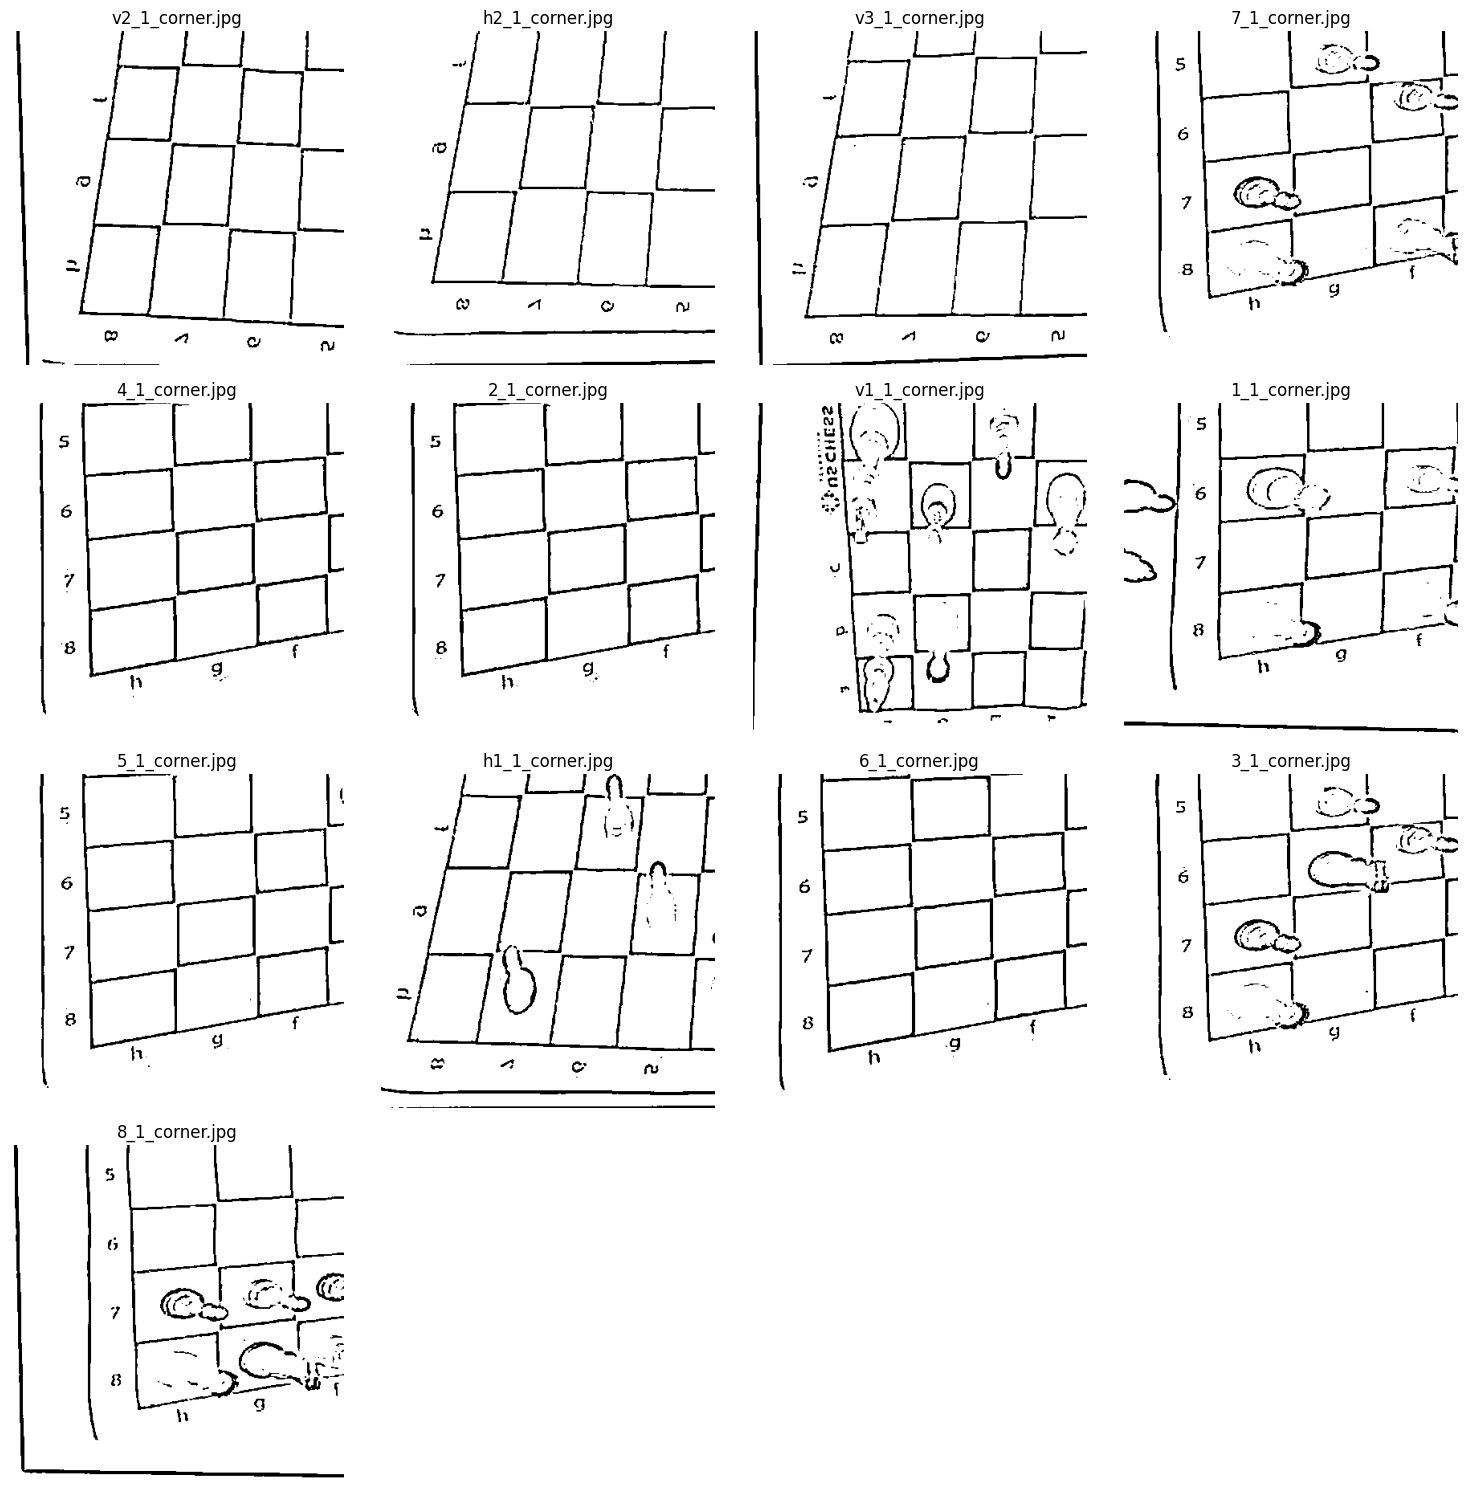

In [20]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Get a list of image files in the folder
image_files = [f for f in os.listdir(input_folder) if f.endswith('corner.jpg')]

# Number of images
num_images = len(image_files)

# Define grid size (e.g., 3 rows and 3 columns for a 9-image grid)
grid_size = int(np.ceil(np.sqrt(num_images)))  # This calculates the grid size to fit the number of images

# Create a figure to display all the images
plt.figure(figsize=(15, 15))

# Loop over the image files and display them in subplots
for i, image_file in enumerate(image_files):
    image_path = os.path.join(input_folder, image_file)
    
    # Load the image
    image = cv2.imread(image_path)
    
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    height, width = gray.shape
    crop = gray[height // 2:, 0:width // 2]
    
    # Resize the image
    height, width = crop.shape
    enlarge = cv2.resize(crop, (width * 2, height * 2), interpolation=cv2.INTER_CUBIC)
    height, width = enlarge.shape
    
    # Normalize the image
    norm = cv2.normalize(enlarge, np.zeros((height, width)), 0, 255, cv2.NORM_MINMAX)
    
    # Apply adaptive thresholding
    th = cv2.adaptiveThreshold(norm, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 20)
    
    # Create subplot for each image
    plt.subplot(grid_size, grid_size, i + 1)  # Position (i + 1) in the grid
    plt.imshow(th, cmap='gray')
    plt.title(f'{image_file}')
    plt.axis('off')  # Hide axes

# Display the grid of images
plt.tight_layout()
plt.show()
